<a href="https://colab.research.google.com/github/HAgarOsman2002/nw/blob/main/Breast_cancer(impmentation_of_neural_network_from_scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00


#**import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns
# from collections import Counter

20

#**load & show the DataSet**

In [ ]:
data =load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#get the keys of the dataset

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.DESCR.split("\n")

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 569',
 '',
 '    :Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 '    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features w

#**convert the dataset to dataframe**

In [ ]:
X= data.data
y=data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df["target"] = data["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


* check the balance
   * data unbalanced

In [ ]:
x=df.drop(["target"],axis=1)
y=df["target"]

target
1    357
0    212
Name: count, dtype: int64

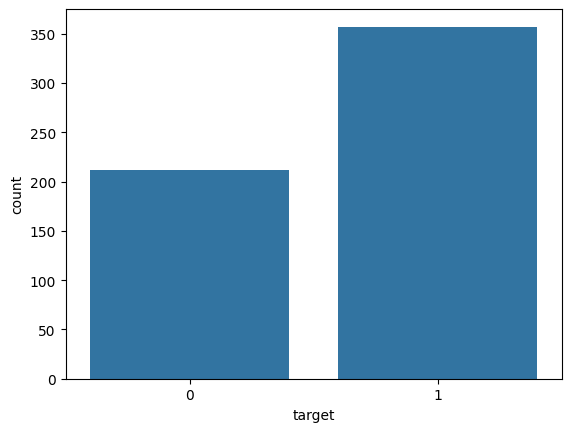

In [ ]:
sns.countplot(x="target",data=df)
df["target"].value_counts()

#**check Datatypes**

In [ ]:
dtypes=df.dtypes
n_unique = df.nunique()
pd.DataFrame({"DataTypes":dtypes,"N_unique":n_unique}).T

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
DataTypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
N_unique,456,479,522,539,474,537,537,542,432,499,...,511,514,544,411,529,539,492,500,535,2


#**check for null values**

In [ ]:
null_values = df.isnull().sum()
null_ratio =null_values/df.shape[0]
data_types= df.dtypes
pd.DataFrame({"Null_sum":null_values,"Null_Ratio":null_ratio,"DataTypes":data_types}).T

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
Null_sum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DataTypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


#**upsampling for 0 class**

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority",k_neighbors=5)
X_resampled, y_resampeld = smote.fit_resample(X_train,y_train)


In [ ]:
# from imblearn import under_sampling, over_sampling
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampeld = ros.fit_resample(X_train,y_train)
# print(sorted(Counter(y_resampeld).items()),y_resampeld.shape)

#**split Data_set**

In [ ]:
X_train,X_test , y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

#**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


#**Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression

# 2. Train the Model
model = LogisticRegression()
model.fit(X_resampled, y_resampeld)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9824561403508771


In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#**import perceptron from scratch**

#Activation function(sigmoid)

In [ ]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

#prepare_perceptron

In [ ]:
def perceptron(x,weight,bias):
  net = np.dot(x,weight) + bias
  y_pred = sigmoid(net)
  new_pred= [1 if i>0.5 else 0 for i in y_pred]
  return new_pred

#update weight

In [ ]:
def updat_weight(weight, x, y_pred, y_actual, lr):
    m = len(y_actual)
    deriv_cost_function = 1 / m * np.dot(x.T, (y_pred - y_actual))
    new_weight = weight - lr * deriv_cost_function
    return new_weight


#update_bias

In [ ]:
def updat_bias(weight,x,y_pred,y_actual,lr):
  m =len(y)   #number of rows
  deriv_cost_function = 1/m * sum(y_pred - y_actual)
  bias =weight - lr* deriv_cost_function
  return bias

#Evaluation

In [ ]:
def accuracy_of_NN(y_pred,y_actual):
  return np.sum(y_pred == y_actual)/len(y_actual)

#train

In [ ]:
X_train.shape

(455, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
weight = np.zeros(30)
lr =0.001
bias=0
for i in range(1000):
  y_pred=perceptron(X_train,weight,bias)
  weights =updat_weight(weight,X_train,y_pred,y_train,lr)
  bias=updat_bias(bias,X_train,y_pred,y_train,lr)


In [ ]:
weights

array([-3.46963452e-04, -2.01108801e-04, -3.53624553e-04, -3.35897332e-04,
       -1.81261031e-04, -2.85347813e-04, -3.30143143e-04, -3.75974674e-04,
       -1.68208380e-04,  6.91342641e-06, -2.60981557e-04,  1.55862714e-06,
       -2.55707919e-04, -2.49838233e-04,  2.80844821e-05, -1.22908372e-04,
       -1.04391000e-04, -1.83726888e-04, -2.28193740e-06, -2.01618134e-05,
       -3.70375580e-04, -2.25879798e-04, -3.74468756e-04, -3.49283698e-04,
       -2.07945986e-04, -2.84541112e-04, -3.14048181e-04, -3.81178930e-04,
       -2.12758079e-04, -1.51234508e-04])

In [ ]:
bias

0.00045694200351493845

In [ ]:
y_pred =perceptron(X_test,weights,bias)
accuracy_of_NN(y_pred,y_test)


0.9736842105263158